손실함수
  - 오차제곱합
  - 교차 엔트로피

  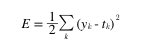

In [78]:
# 미분을 수월하게 하기위해서, 신경망에서 학습은 경사하강법-미분관 관련
import numpy as np
def sum_squres_erros(y,t):
  return np.sum((y-t)**2)*0.5

In [79]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
print(sum_squres_erros(t,y))

y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0])
print(sum_squres_erros(t,y))

0.09750000000000003
0.5975


교차엔트로피

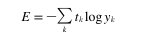

In [80]:
# tk는 원핫인코딩
# 정답레이블 2 신경망 출력0.6
# -log0.6 =0.51
# 출력 0.1  -log0.1  = 2.30

# no.log --> 0을 입력하면 -inf(마이너스 무한대)
def corss_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

In [81]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
print(corss_entropy_error(t,y))

y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0])
print(corss_entropy_error(t,y))

6.447238200383332
14.50628607586249


미니배치  교차엔트로피

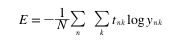
  

In [82]:
# t:정답, y:예측
# t가 원핫이고  t = 0이면 교차엔트로피 오차도 0 ->출력값만으로 교차엔트로피 계산
def corss_entropy_error(y,t):
  delta = 1e-7
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  batch_size = y.shape[0]
  return -np.sum(t*np.log(y[np.arrange(batch_size),t ]+delta)) / batch_size

In [83]:
# 매 학습마다 손실함수를 이용한 값이 작아지도록 가중치와 편향을 찾아내는 작업 - 학습
# 미분 : 가중치의 변화량에 대한 손실함수의 변화량
# 미분이 음수 : 가중치를 양의방향으로 변화->손실함수의 값을 줄임
# 미분이 양수 : 가중치를 음의방향으로 변화->손실함수의 값을 줄임
# 활성화함수 : 계단함수... 0 1  -> 정확도... 미분을 하면 거의 0이고  이 으미는 미세한 변화를 감지x
# 시그모이드.... 미세한 변화도 감지.. 미분가능

수치미분

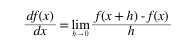

In [84]:
# 10분에 2km 이동   speed = 2/10  0.2km  --> 평균
# 특정 순간의 변화량 x

In [85]:
def numeric_diff(f,x):
  h = 10e-50      # 이런 값으 사용 불가  반올림 오차  np.float(1e-50)  0.0   1e-4
  return (f(x+h)-f(x)) / h  # 미분. x위치에서 함수의 기울기

In [86]:
def numeric_diff(f,x):
  h = 1e-4 # 0.001
  return (f(x+h)-f(x-h)) / (2*h)

y = 0.01x**2 + 0.1x

In [87]:
def func(x):
  return 0.01*x**2 + 0.1*x

# 미분... 0.02*x + 0.1
# x = 5    0.2   x=10 0.3

In [88]:
import matplotlib.pyplot as plt

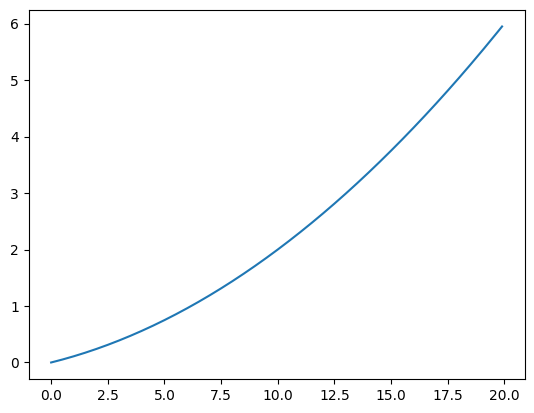

In [89]:
x = np.arange(0.0,20.0,0.1)
y = func(x)
plt.plot(x,y)
plt.show()

In [90]:
# x= 5, 10    0.2 0.3
numeric_diff(func,5),  numeric_diff(func,10)

(0.1999999999990898, 0.2999999999986347)

f(x) = xxxxx  매개변수가 1개

f(x0,x1) = x0 ** 2 + x1 ** 2

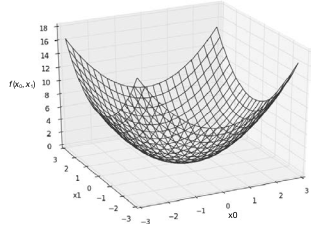

편미분 : 미분해야할 변수가 여러개인

In [91]:
# x0 = 3  x1 = 4일때 x0에 대한 편미분
def func2(x0):
  return x0*x0 + 4.0**2
numeric_diff(func2,3.0)

6.00000000000378

In [92]:
# x0 = 3  x1 = 4일때 x1에 대한 편미분
def func3(x1):
  return 3.0**2 + x1*x1
numeric_diff(func3,4.0)

7.999999999999119

모든변수의 편이분을 벡터로 정리한게 기울기(Gradient)

In [93]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val =  x[idx]
    # f(x+h)
    x[idx] = tmp_val+h
    fxh1 = f(x)
    # f(x-h)
    x[idx] = tmp_val-h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val # rollback 값을 복원
  return grad

In [94]:
# 세 점 사이의 기울기  (3,4) (0,2) (3,0)
# f(x0 , x1) = x0**2 + x1**2
def func4(x):
  return x[0]**2 + x[1]**2
print( numerical_gradient(func4, np.array([3.0, 4.0]))  )
print( numerical_gradient(func4, np.array([0.0, 2.0]))  )
print( numerical_gradient(func4, np.array([3.0, 0.0]))  )

[6. 8.]
[0. 4.]
[6. 0.]


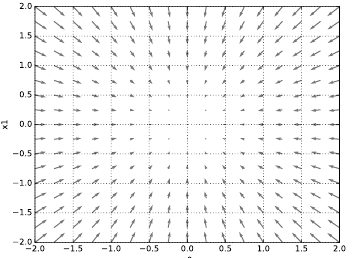

기울기가 가리키는 쪽은 각 위치에서 출력값을 가장 크게 줄이는 방향

경사법
  - 하강법
  - 상승법

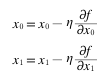

In [95]:
def gradient_descent(f,int_x,lr=0.01,step_num = 100):
  x = int_x
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr*grad
  return x

In [96]:
# f(x0, x1) = x0**2 + x1**2  경사하강법으로 최소값을 구해보자

In [97]:
def func(x):
  return x[0]**2 + x[1]**2

#초기값을
init_x = np.array([-3.0, 4.0])
gradient_descent(func,init_x,0.1,100)  # 0,0


array([-6.11110793e-10,  8.14814391e-10])

In [98]:
# 학습률이 너무 크면  - 벗어났음
init_x = np.array([-3.0, 4.0])
gradient_descent(func,init_x,10.0,100)  # 0,0

array([-2.58983747e+13, -1.29524862e+12])

In [99]:
# 학습률이 너무 작으면  - 갱신되다가 종료
init_x = np.array([-3.0, 4.0])
gradient_descent(func,init_x,1e-4,100)  # 0,0

array([-2.94059014,  3.92078685])

신경망에서 기울기 : 2x3 가중치 W   손실함수 L
경사
image.png


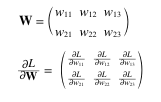

In [100]:
import numpy as np
def softmax(x):
  exp_x = np.exp(x - np.max(x))
  softmax_x = exp_x / np.sum(exp_x)
  return softmax_x

def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(np.log(y+delta)*t)

In [101]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
  def predict(self,x):
    return np.dot(x, self.W)
  def loss(self, x, t):  #x 는 학습용 데이터, t는 정답
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)
    return loss

In [102]:
np.random.randn(2,3)

array([[-0.55134194,  0.37830946, -1.01080142],
       [-1.44334615, -0.23654032,  2.45493371]])

In [103]:
net = simpleNet()
net.W

array([[-0.45767812,  1.23189307,  0.35246505],
       [ 1.14099213, -0.09413328, -0.22933048]])

In [104]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[0.75228604 0.6544159  0.0050816 ]


In [105]:
np.argmax(p)

0

In [106]:
t = np.array([1,0,0])
net.loss(x,t)

0.8672916466982012

In [107]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in np.ndindex(x.shape):
    tmp_val =  x[idx]
    # f(x+h)
    x[idx] = tmp_val+h
    fxh1 = f(x)
    # f(x-h)
    x[idx] = tmp_val-h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val # rollback 값을 복원
  return grad
# 기울기
def f(W):
  return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

[[-0.34794732  0.22855283  0.11939449]
 [-0.52192099  0.34282924  0.17909174]]


각 노드별 기울기를 구했으므로 학습에 사용된 가중치를 갱신
  - 1. 미니배치
  - 2. 기울기 산출
  - 3. 매개변수 갱신
  - 4. 1 ~ 3번을 반복

In [108]:
# 미니배치: 랜덤하게 골라서 사용 --> 확률적 경사 하강법 SGD

In [109]:
# 두개의 층을 가지는 network
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class TwoLayerNetwork:
  def __init__(self,input_size,hidden_size,out_size,weight_init_std=0.01):
    self.param = {}
    self.param['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
    self.param['b1'] = np.zeros(hidden_size)

    self.param['W2'] = weight_init_std*np.random.randn(hidden_size,out_size)
    self.param['b2'] = np.zeros(out_size)
  def predict(self, x):
    W1,W2 = self.param['W1'], self.param['W2']
    b1,b2 = self.param['b1'], self.param['b2']

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1,W2) + b2
    y = softmax(a2)
    return y
  # 손실함수 입력 x  정답  t
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y,t)

  # 정확성
  def accuracy(self,x,t):
    y = self.predict(x)
    y = np.argmax(y,axis=1)
    t = np.argmax(t,axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  def numeric_gradient(self,x,t):
    loss_W = lambda w : self.loss(x,t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.param['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.param['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.param['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.param['b2'])
    return grads



In [110]:
# net = TwoLayerNetwork(input_size = 784, hidden_size=100,out_size=10)

In [111]:
# x = np.random.rand(100,784)
# y = net.predict(x)
# x[:2], y[:2]

In [112]:
# x = np.random.rand(100,784)
# t = np.random.rand(100,10)
# x[:2], t[:2]

In [113]:
# grads = net.numeric_gradient(x,t)

In [114]:
# grads['W1'].shape, grads['b1'].shape

In [115]:
# grads['W2'].shape, grads['b2'].shape

In [116]:
import tensorflow as tf

In [117]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
# 전처리.. shape, 255.0
x_train, x_test = x_train.reshape(-1,28*28), x_test.reshape(-1,28*28)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)
print(x_train.shape, y_train.shape)
train_loss_list = []
# 하이퍼 파라메터
lr = 0.1
epochs = 10000
train_size = x_train.shape[1]  # 784
batch_size = 100
net = TwoLayerNetwork(input_size=train_size, hidden_size=50,out_size=10)
for i in range(epochs):
  # 미니배치
  batch_mask = np.random.choice(train_size,batch_size)
  x_batch = x_train[batch_mask]
  y_batch = y_train[batch_mask]
  # 기울기 계산
  grad = net.numeric_gradient(x_batch,y_batch)

  # 매개변수 갱신
  for key in ['W1','b1','W2','b2']:
    net.param[key] -= lr*grad[key]

  loss = net.loss(x_batch,y_batch)
  train_loss_list.append(loss)

(60000, 784) (60000, 1)


<ipython-input-109-eaf9915fb4bf>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
y_batch.shape